## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [93]:
import numpy as np 
from numpy import math 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

# Data Cleaning

In [94]:
#Load the dataset
df = pd.read_excel("Online Retail.xlsx")

In [95]:
#Checking top 5 rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [96]:
#Checking the bottom 5 rows of the dataset 
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [97]:
#Check the shape of the dataset 
df.shape

(541909, 8)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [99]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Majority of the null are in customers. We can drop those null values in cutomer ID column as we are making a customer segmentation model and those null values will not make sense. 

In [100]:
df.dropna(inplace=True)

In [101]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [103]:
df.shape

(406829, 8)

After removing the null values we have 406829 records and 8 columns in our dataset. 

In [104]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [105]:
#changing datatype 
df["InvoiceNo"]=df["InvoiceNo"].astype("str")
df=df[~df["InvoiceNo"].str.contains("C")]

We dropped some invoice number which starts with C as this indicates a cancellation

In [106]:
df.shape

(397924, 8)

In [107]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


# EDA

In [108]:
description_df= df["Description"].value_counts().reset_index()
print(description_df)

                             Description  count
0     WHITE HANGING HEART T-LIGHT HOLDER   2028
1               REGENCY CAKESTAND 3 TIER   1724
2                JUMBO BAG RED RETROSPOT   1618
3          ASSORTED COLOUR BIRD ORNAMENT   1408
4                          PARTY BUNTING   1397
...                                  ...    ...
3872         RUBY GLASS CLUSTER EARRINGS      1
3873      PINK CHRYSANTHEMUMS ART FLOWER      1
3874     72 CAKE CASES VINTAGE CHRISTMAS      1
3875        WALL ART , THE MAGIC FOREST       1
3876         PAPER CRAFT , LITTLE BIRDIE      1

[3877 rows x 2 columns]


<Axes: title={'center': 'Top 5 Product Name'}, xlabel='count', ylabel='Description'>

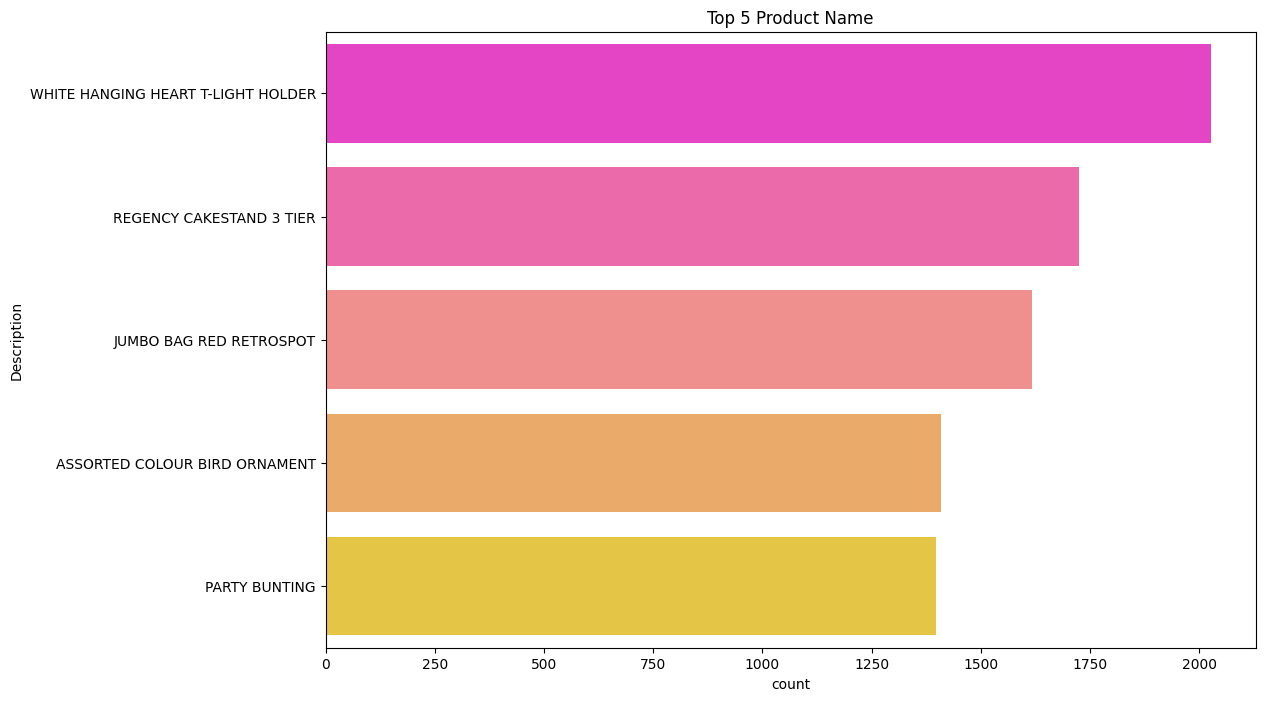

In [109]:
plt.figure(figsize=(12,8))
plt.title("Top 5 Product Name")
sns.barplot(x="count", y = "Description", data = description_df[:5], palette="spring")

### **Top product based on maximum selling are :**
1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.ASSORTED COLOUR BIRD ORNAMENT

5.PARTY BUNTING

In [110]:
description_df.tail(5)

,Description,count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


### **Bottom 5 Product based on the selling are:**
1. RUBY GLASS CLUSTER EARRINGS

2. PINK CHRYSANTHEMUMS ART FLOWER

3. 72 CAKE CASES VINTAGE CHRISTMAS

4. WALL ART , THE MAGIC FOREST

5. PAPER CRAFT , LITTLE BIRDIE

In [111]:
stock_df = df["StockCode"].value_counts().reset_index()
print(stock_df)

     StockCode  count
0       85123A   2035
1        22423   1724
2       85099B   1618
3        84879   1408
4        47566   1397
...        ...    ...
3660     90168      1
3661     90169      1
3662    90202A      1
3663     90118      1
3664     23843      1

[3665 rows x 2 columns]


<Axes: title={'center': 'Top 5 Stock Name'}, xlabel='count', ylabel='StockCode'>

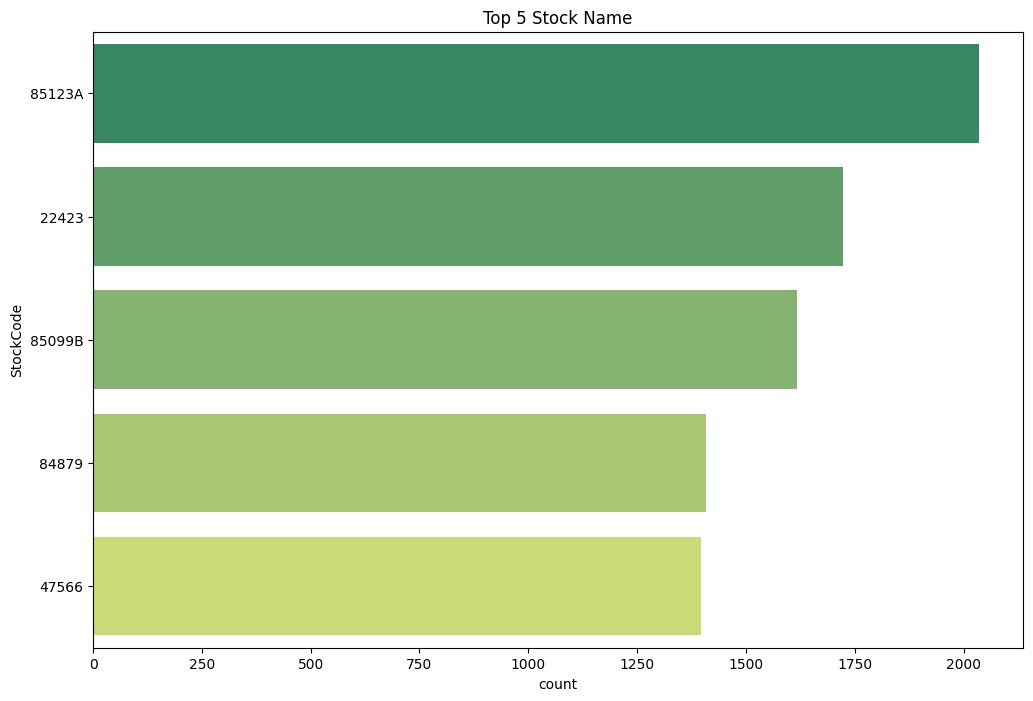

In [112]:
plt.figure(figsize=(12,8))
plt.title("Top 5 Stock Name")
sns.barplot(x="count", y = "StockCode", data = stock_df[:5], palette="summer")

### **Top 5 Stock name based on selling are :**
1.85123A

2.22423

3.85099B 

4.84879

5.4756

In [113]:
stock_df.tail(5)

,StockCode,count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


Country Name

In [114]:
country_df = df["Country"].value_counts().reset_index()
print(country_df)

                 Country   count
0         United Kingdom  354345
1                Germany    9042
2                 France    8342
3                   EIRE    7238
4                  Spain    2485
5            Netherlands    2363
6                Belgium    2031
7            Switzerland    1842
8               Portugal    1462
9              Australia    1185
10                Norway    1072
11                 Italy     758
12       Channel Islands     748
13               Finland     685
14                Cyprus     614
15                Sweden     451
16               Austria     398
17               Denmark     380
18                Poland     330
19                 Japan     321
20                Israel     248
21           Unspecified     244
22             Singapore     222
23               Iceland     182
24                   USA     179
25                Canada     151
26                Greece     145
27                 Malta     112
28  United Arab Emirates      68
29    Euro

<Axes: title={'center': 'Top 5 Country'}, xlabel='count', ylabel='Country'>

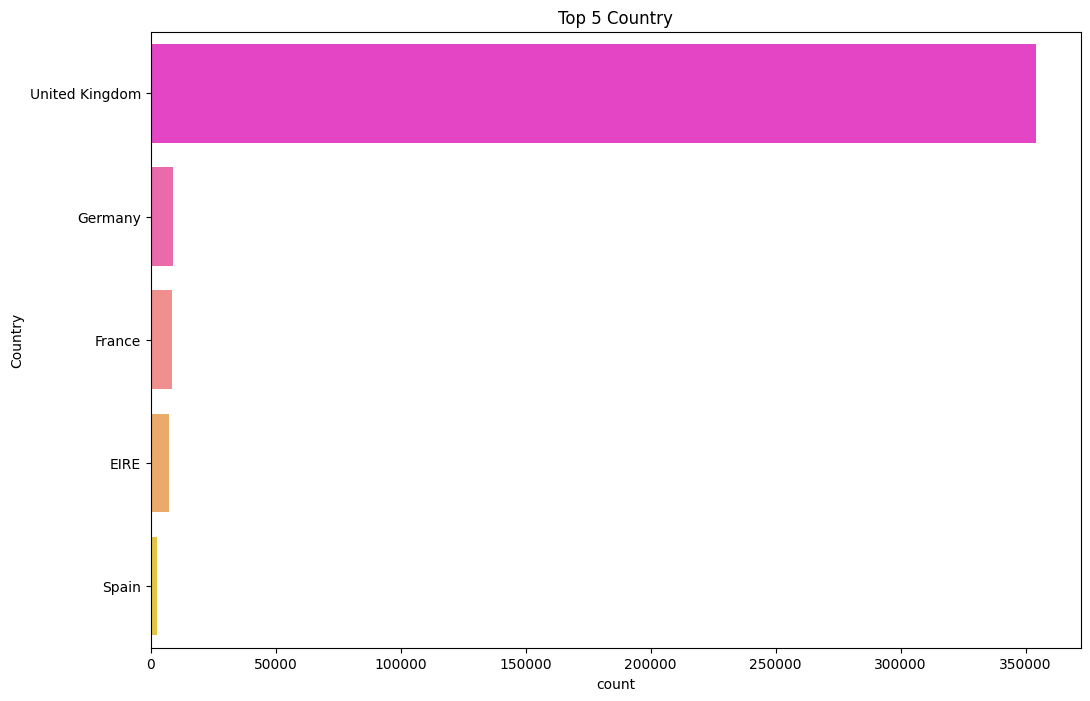

In [115]:
#plot top 5 country 
plt.figure(figsize=(12,8))
plt.title("Top 5 Country")
sns.barplot(x="count", y = "Country", data = country_df[:5], palette="spring")

From this graph we can see that most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have Germany ,France ,EIRE and Spain

In [116]:
country_df.tail(5)

,Country,count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


Distribution of the quanitity

<Axes: title={'center': 'Distribution of the quantity'}, xlabel='Quantity', ylabel='Density'>

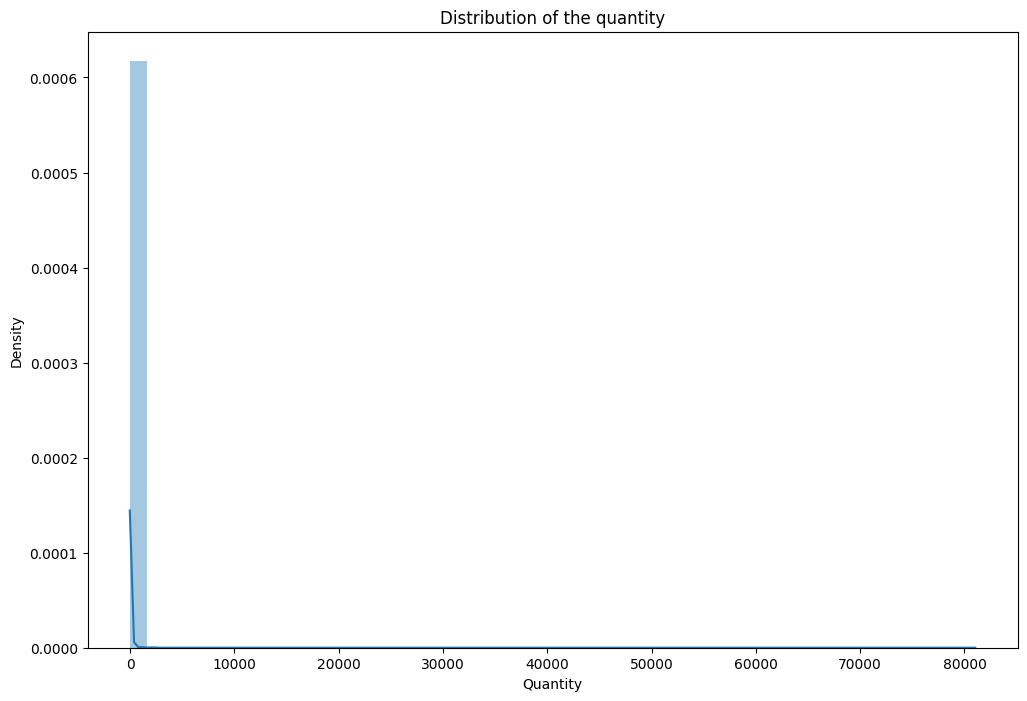

In [117]:
plt.figure(figsize=(12, 8))
plt.title("Distribution of the quantity")
sns.distplot(df["Quantity"])

The distribution is heavily right-skewed. This means that most of the "Quantity" values are very small, and there are only a few cases where the quantity is significantly large.

<Axes: title={'center': 'Log Distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

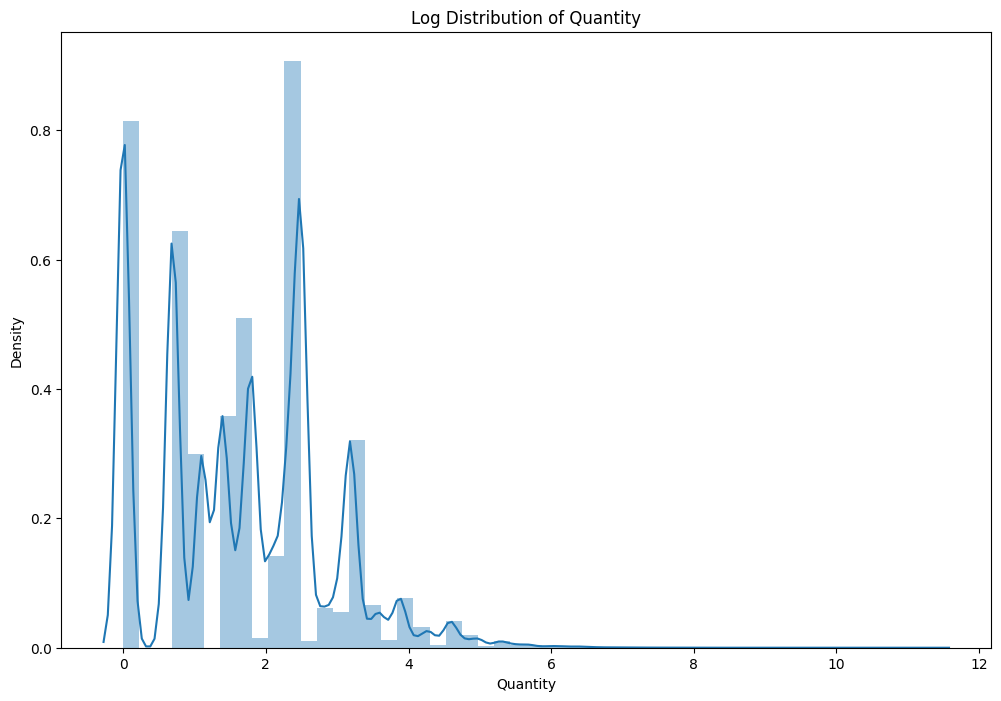

In [118]:
# Transforming the distribution to symmetrical distribution 
plt.figure(figsize=(12,8))
plt.title("Log Distribution of Quantity")
sns.distplot(np.log(df["Quantity"]))

Distribution of the Unit Price

<Axes: title={'center': 'Unit Price Distribution'}, xlabel='UnitPrice', ylabel='Density'>

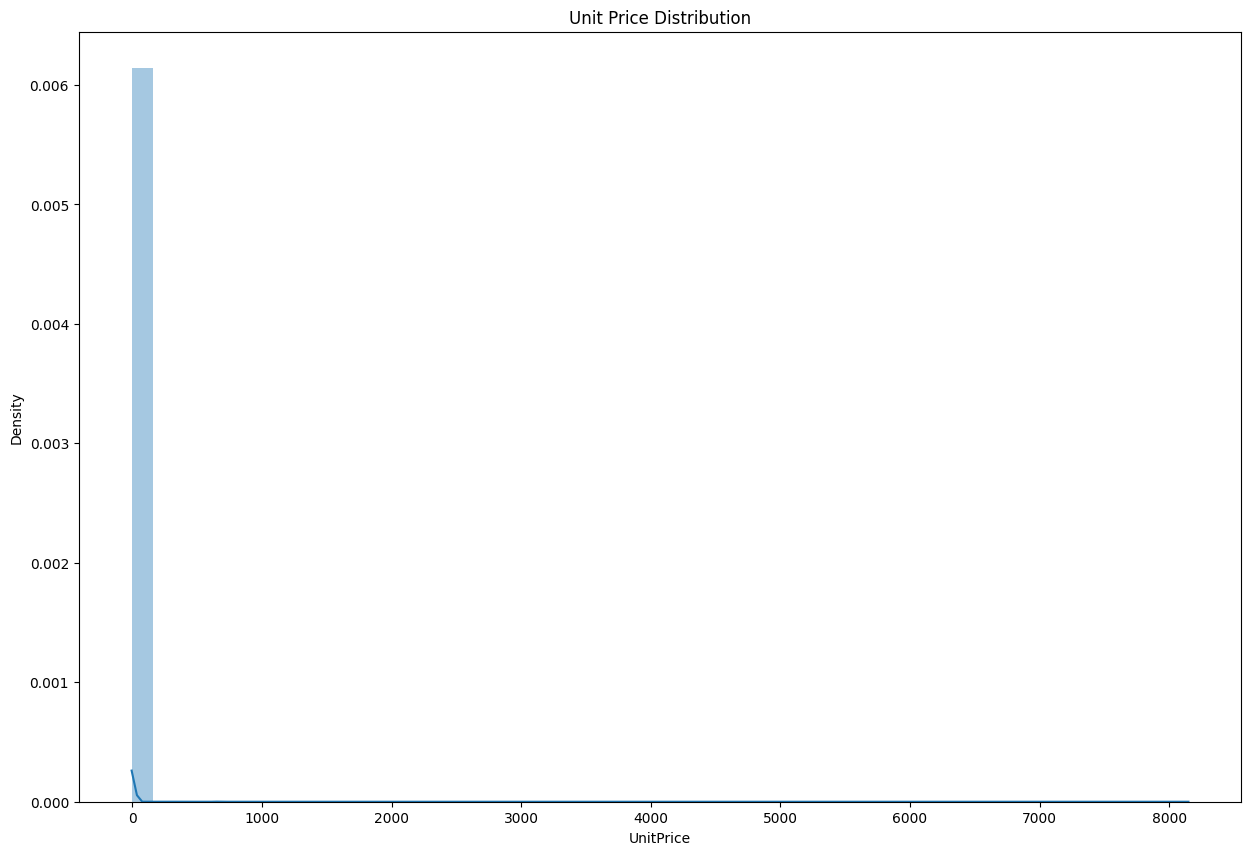

In [119]:
plt.figure(figsize=(15,10))
plt.title("Unit Price Distribution")
sns.distplot(df["UnitPrice"])

From the distribution of unit price, we can say that most items have a lower price range.

In [120]:
#Checking for unit price less than 0 (Outlier)
df[df["UnitPrice"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# Feature Engineering

In [121]:
df["Month"]=df["InvoiceDate"].dt.month_name()
df["Day"]= df["InvoiceDate"].dt.day_name()
df["Hour"]=df["InvoiceDate"].dt.hour

In [122]:
#Creating a new feature called Total Amount from quantity and unit price 
df["Total Amount"]=df["UnitPrice"]*df["Quantity"]


In [123]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34


<Axes: title={'center': 'Total Price Distribution'}, xlabel='Total Amount', ylabel='Density'>

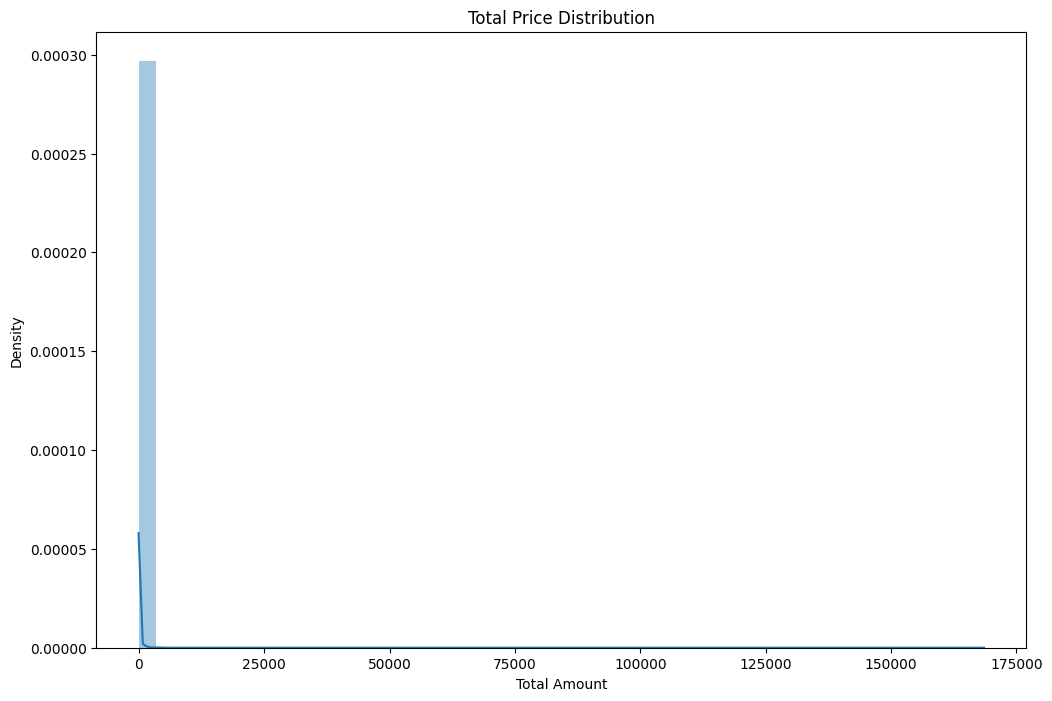

In [124]:
#Distribution of total amount 
plt.figure(figsize=(12,8))
plt.title("Total Price Distribution")
sns.distplot(df["Total Amount"])

In [125]:
#Creating a month df 
month_df = df["Month"].value_counts().reset_index()
print(month_df)

        Month  count
0    November  64545
1     October  49557
2    December  43464
3   September  40030
4         May  28322
5        June  27185
6       March  27177
7      August  27013
8        July  26827
9       April  22644
10    January  21232
11   February  19928


<Axes: title={'center': 'Month wise Transaction'}, xlabel='Month', ylabel='count'>

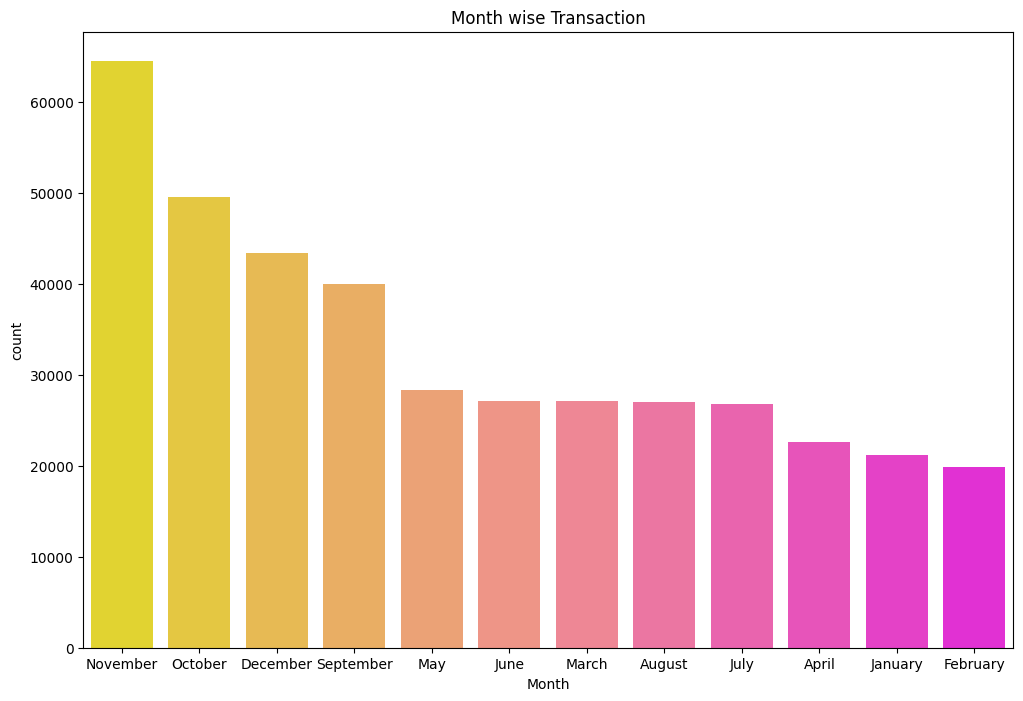

In [126]:
plt.figure(figsize=(12,8))
plt.title("Month wise Transaction")
sns.barplot(x="Month", y = "count", data = month_df, palette="spring_r")

Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.

Least numbers of purchasing are in the month of January and February.

In [127]:
day_df=df["Day"].value_counts().reset_index()
print(day_df)

         Day  count
0   Thursday  80052
1  Wednesday  68888
2    Tuesday  66476
3     Monday  64899
4     Sunday  62775
5     Friday  54834


<Axes: title={'center': 'Day wise Transaction'}, xlabel='Day', ylabel='count'>

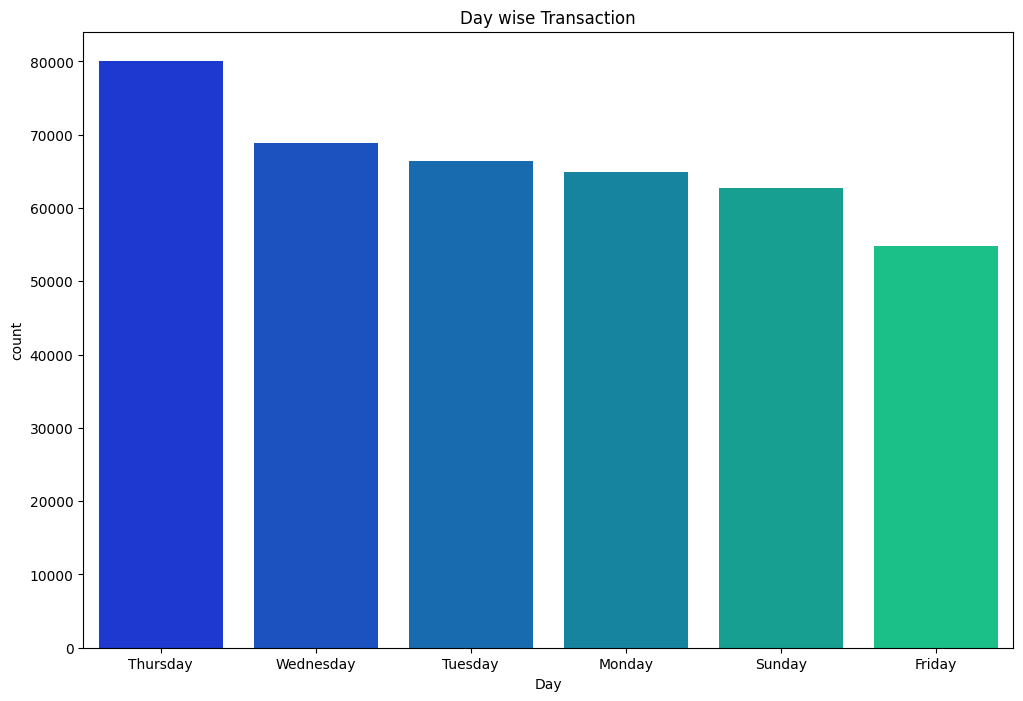

In [128]:
plt.figure(figsize=(12,8))
plt.title("Day wise Transaction")
sns.barplot(x="Day", y = "count", data = day_df, palette='winter')

We can see the maximum number of transaction are for thursday but we can also see there are no transaction on saturday at this point I have no idea why but there can be reasons porbably data is not availble for saturdays or no transactions happened on saturday.

Most of the customers have purchased the items in Thursday ,Wednesday and Tuesday.

In [129]:
hour_df= df["Hour"].value_counts().reset_index()
print(hour_df)

    Hour  count
0     12  72069
1     13  64031
2     14  54127
3     11  49092
4     15  45372
5     10  37999
6     16  24093
7      9  21945
8     17  13072
9      8   8691
10    19   3322
11    18   2929
12    20    802
13     7    379
14     6      1


<Axes: title={'center': 'Hour wise Transaction'}, xlabel='Hour', ylabel='count'>

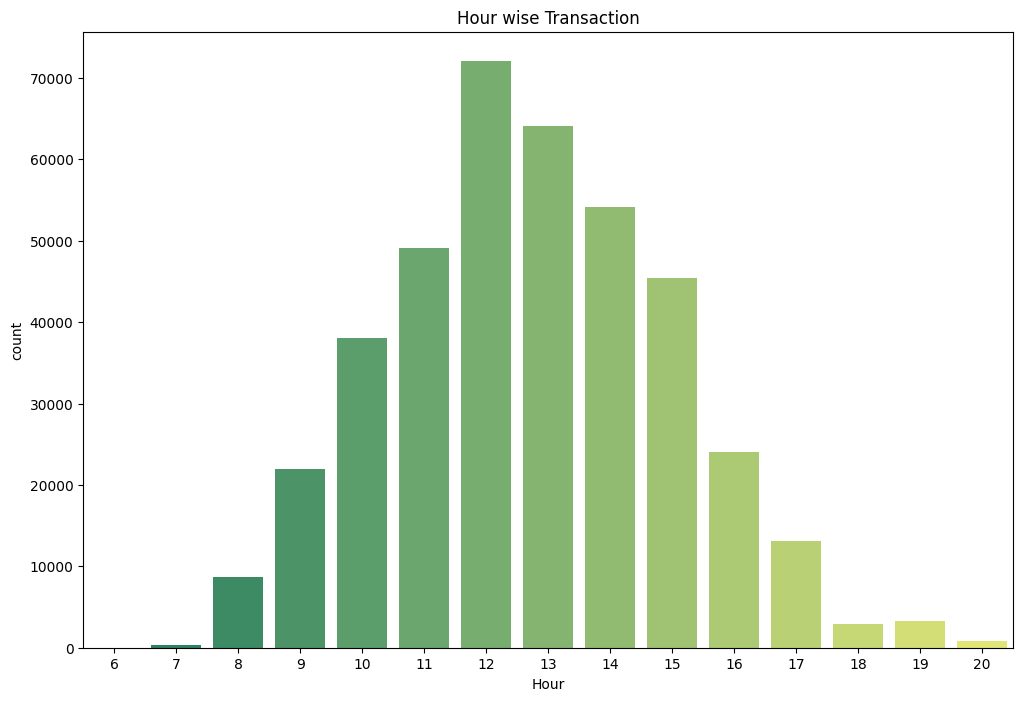

In [130]:
plt.figure(figsize=(12,8))
plt.title("Hour wise Transaction")
sns.barplot(x="Hour", y = 'count', data = hour_df, palette='summer')

From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm

In [131]:
#dividing hours into morning, afternoon and evening
def time_type(time):
    if(time>=6 and time<=11):
        return "Morning"
    elif(time>=12 and time <=17):
        return "Afternoon"
    else:
        return "Evening"

In [132]:
df["Time_type"]=df["Hour"].apply(time_type)
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country     Month

<Axes: title={'center': 'Time Type Wise Transaction'}, xlabel='Time_type', ylabel='count'>

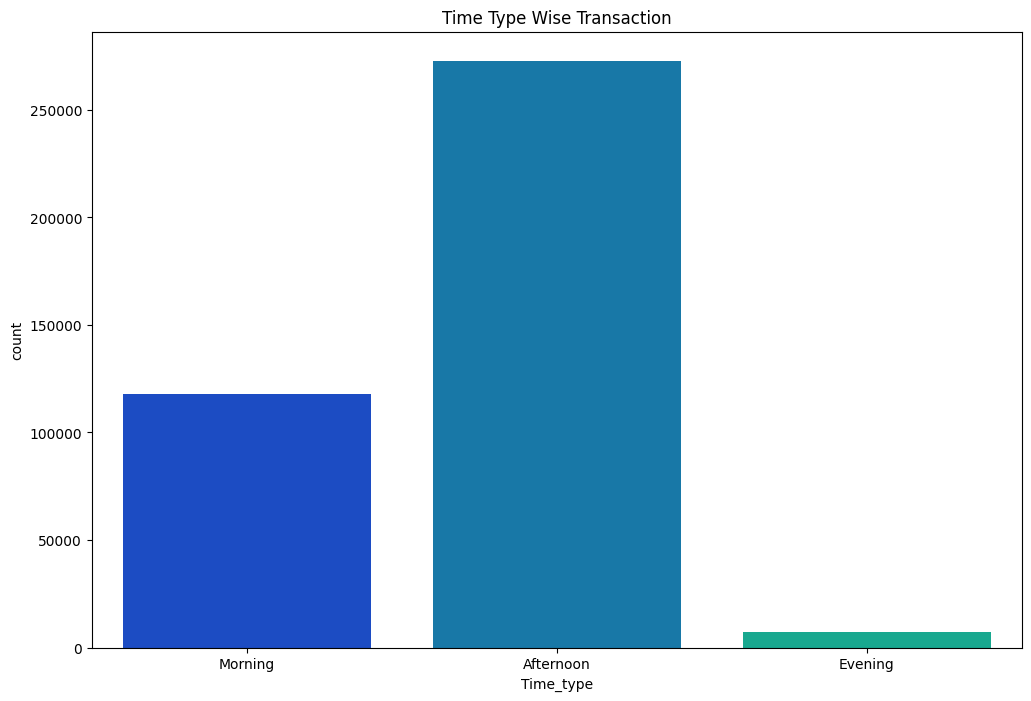

In [133]:
plt.figure(figsize=(12,8))
plt.title("Time Type Wise Transaction")
sns.countplot(x="Time_type", data=df, palette="winter")

Most of the customers have purchased the items in Afternoon.

Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening.To increasse transacction at evening we can offers/discounts at evening

# Create the RFM model (Recency, Frequency,Monetary value)

RFM is a method used for analyzing customer value. 

RFM stands for the three dimensions:

Recency – How recently did the customer purchase?

Frequency – How often do they purchase?

Monetary – How much do they spend?

Recency - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

Frequency - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

Monetary - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.


In [134]:
#Recency = Latest Date - Last Inovice Data
# Frequency = count of invoice no. of transaction(s), 
# Monetary = Sum of Total Amount for each customer
import datetime as dt 

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer 
rfm_df = df.groupby("CustomerID").agg({'InvoiceDate': lambda x:(Latest_Date -x.max()).days, 'InvoiceNo': lambda x:len(x), 'Total Amount': lambda x:x.sum()})

#Convert Recency into int 
rfm_df["InvoiceDate"]=rfm_df["InvoiceDate"].astype(int)

rfm_df.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'Total Amount':'Monetary'}, inplace=True)
rfm_df.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [135]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.041484,91.708689,2053.793018
std,100.007757,228.792852,8988.248381
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,307.245000
50%,50.000000,41.000000,674.450000
75%,141.500000,100.000000,1661.640000
max,373.000000,7847.000000,280206.020000


<Axes: title={'center': 'Recency Distribution Plot'}, xlabel='Recency', ylabel='Density'>

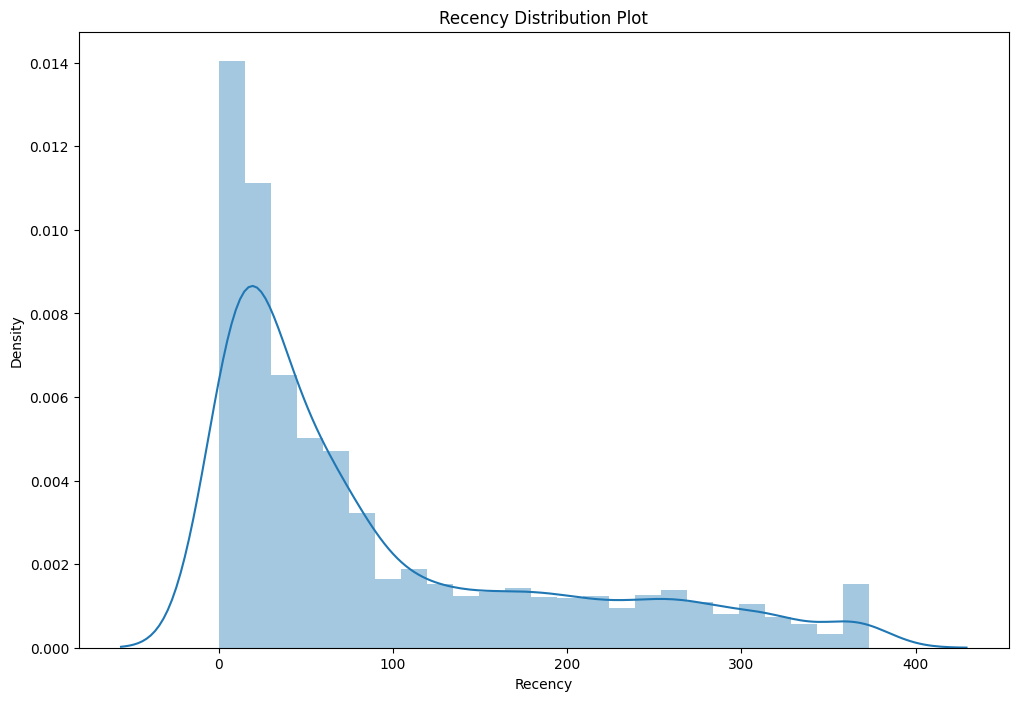

In [136]:
plt.figure(figsize=(12,8))
plt.title("Recency Distribution Plot")
x=rfm_df["Recency"]
sns.distplot(x)

<Axes: title={'center': 'Frequeny Distribution Plot'}, xlabel='Frequency', ylabel='Density'>

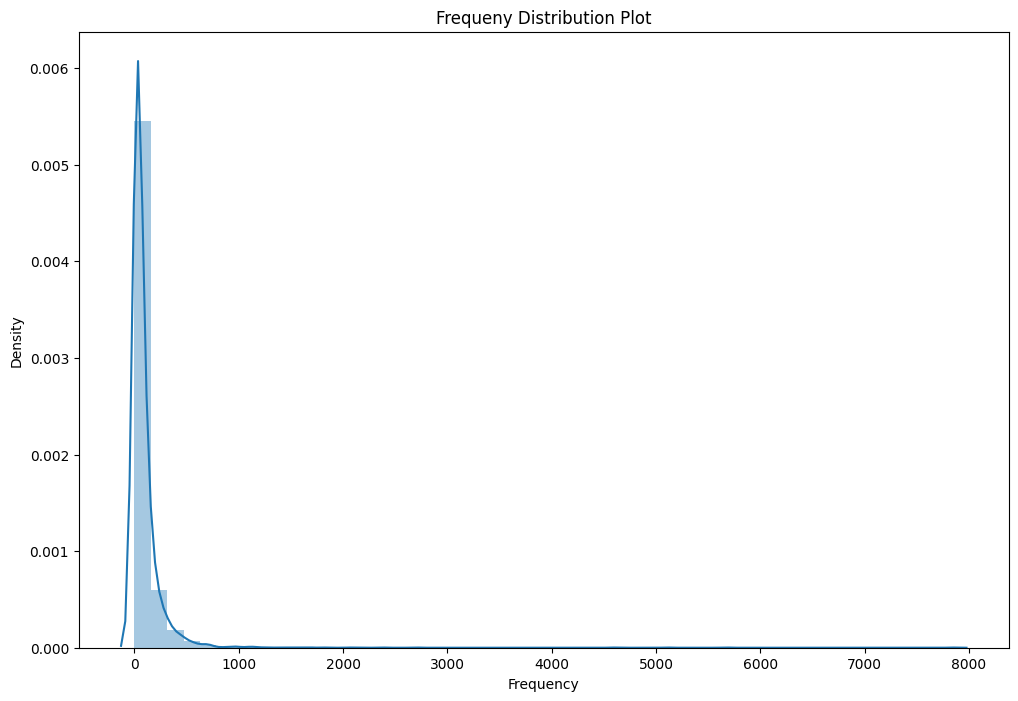

In [137]:
plt.figure(figsize=(12,8))
plt.title("Frequeny Distribution Plot")
x=rfm_df["Frequency"]
sns.distplot(x)

<Axes: title={'center': 'Monetary Distribution Plot'}, xlabel='Monetary', ylabel='Density'>

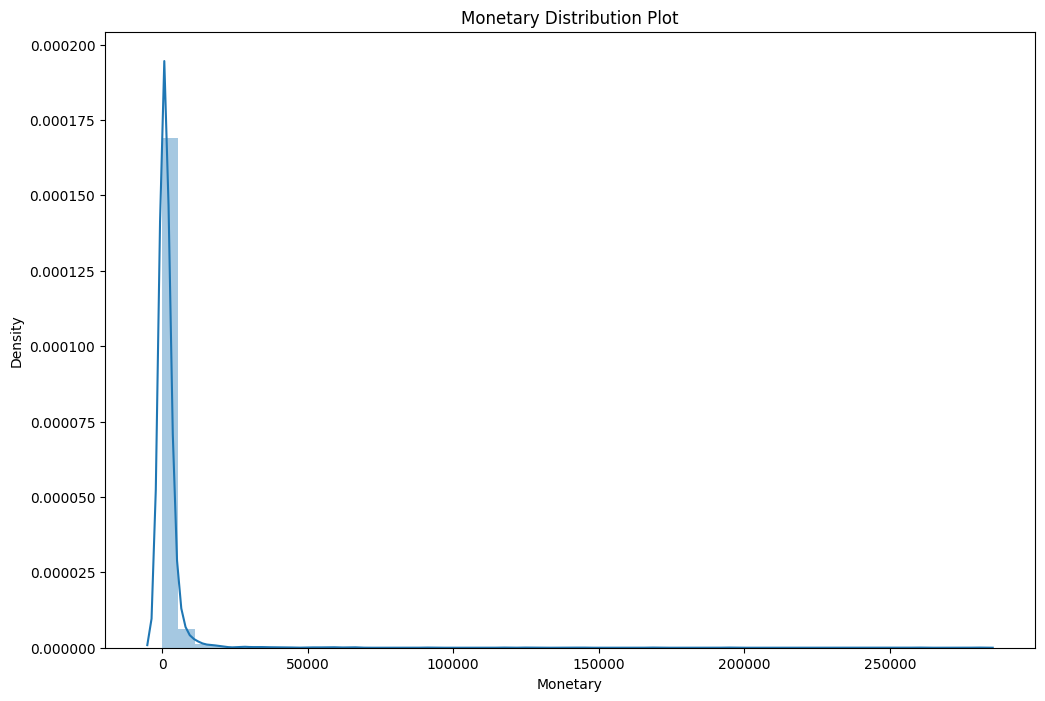

In [138]:
plt.figure(figsize=(12,8))
plt.title("Monetary Distribution Plot")
x = rfm_df["Monetary"]
sns.distplot(x)

From all the above graphs of Recency,Frequency and Monetary we can say that all are positively skewed distribution.

# Splitting into four segments using Quartiles

In [139]:
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])  
quantiles = quantiles.to_dict()
print(quantiles)                                                                                                                                                                                                                                                                   

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5}, 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0}, 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}


In [140]:
#Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.

def RScoring(x, p, d):
    if x<=d[p][0.25]:
        return 1
    elif x<= d[p][0.5]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1


In [141]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R']=rfm_df["Recency"].apply(RScoring, args=('Recency', quantiles,))
rfm_df['F']=rfm_df["Frequency"].apply(FnMScoring, args=("Frequency", quantiles,))
rfm_df['M']=rfm_df["Monetary"].apply(FnMScoring, args=('Monetary', quantiles,))

In [142]:

#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df["RFMGroup"]=rfm_df.R.map(str)+rfm_df.F.map(str)+rfm_df.M.map(str)
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore']=rfm_df[['R','F','M']].sum(axis=1)
rfm_df.head(10)


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11
12352.0,36,85,2506.04,2,2,1,221,5
12353.0,204,4,89.00,4,4,4,444,12
12354.0,232,58,1079.40,4,2,2,422,8
12355.0,214,13,459.40,4,4,3,443,11


In [143]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
    
#Applying handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [144]:
print(Log_Tfd_Data)

            Recency  Frequency  Monetary
CustomerID                              
12346.0       5.784      0.000    11.254
12347.0       0.693      5.204     8.369
12348.0       4.317      3.434     7.494
12349.0       2.890      4.290     7.472
12350.0       5.737      2.833     5.812
...             ...        ...       ...
18280.0       5.624      2.303     5.196
18281.0       5.193      1.946     4.392
18282.0       1.946      2.485     5.182
18283.0       1.099      6.628     7.647
18287.0       3.738      4.248     7.516

[4339 rows x 3 columns]


<Axes: title={'center': 'Data Distribution for Recency after Log Tx'}, xlabel='Recency', ylabel='Density'>

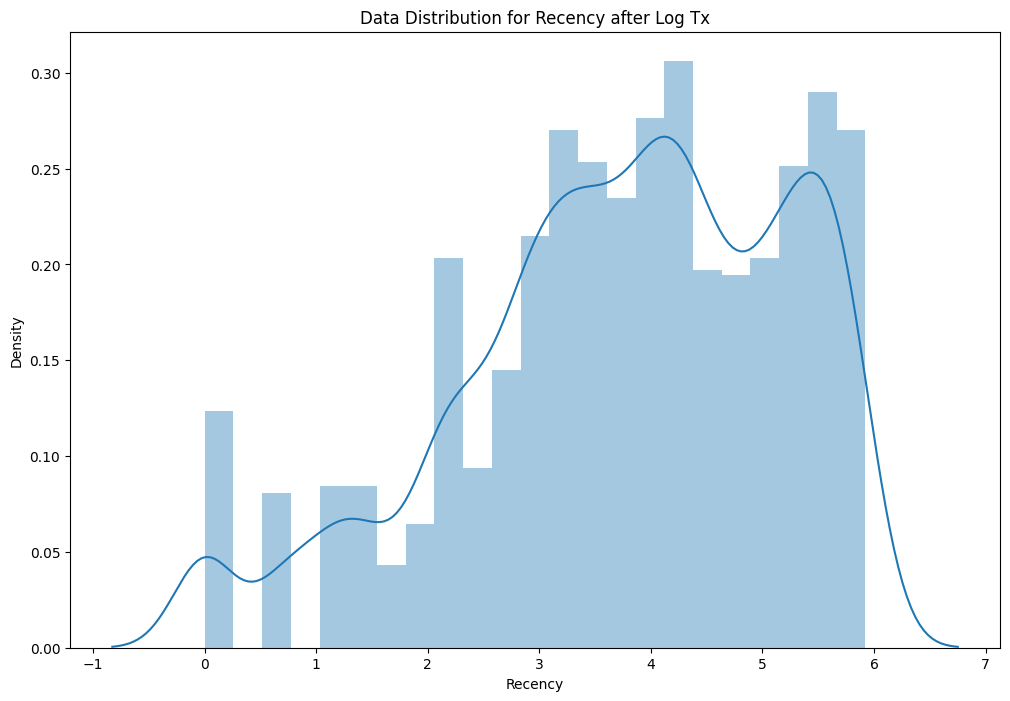

In [145]:
x = Log_Tfd_Data["Recency"]
plt.figure(figsize=(12,8))
plt.title("Data Distribution for Recency after Log Tx")
sns.distplot(x)

<Axes: title={'center': 'Data Distribution of Frequency after Log Tx'}, xlabel='Frequency', ylabel='Density'>

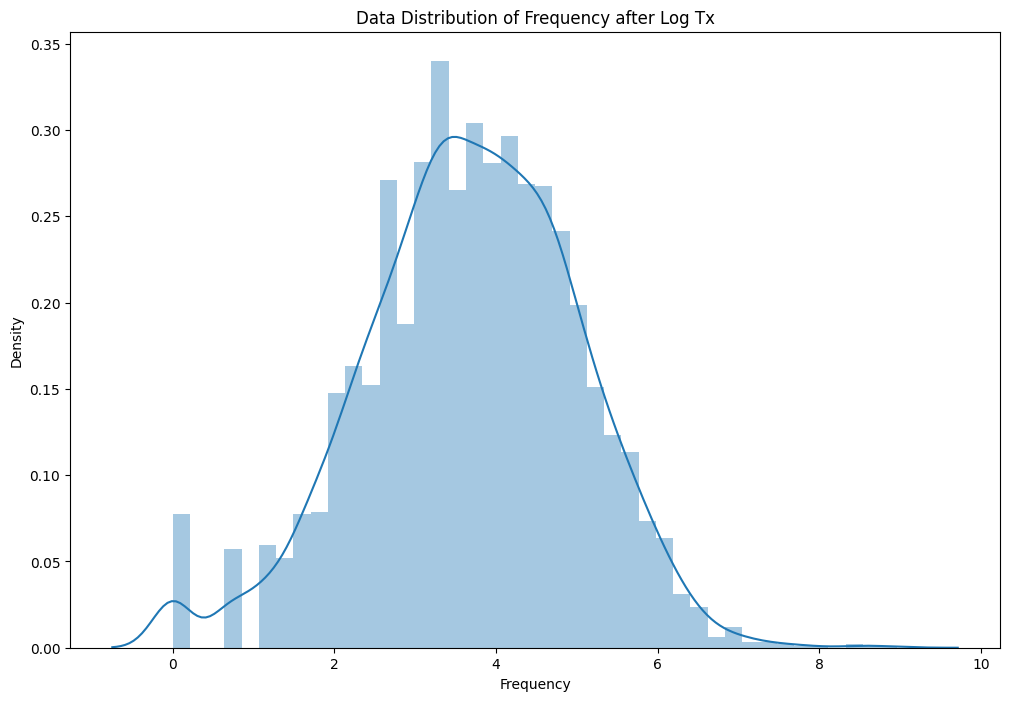

In [146]:
x = Log_Tfd_Data["Frequency"]
plt.figure(figsize=(12,8))
plt.title("Data Distribution of Frequency after Log Tx")
sns.distplot(x)

<Axes: title={'center': 'Data Distribution of Monetary after Log Tx'}, xlabel='Monetary', ylabel='Density'>

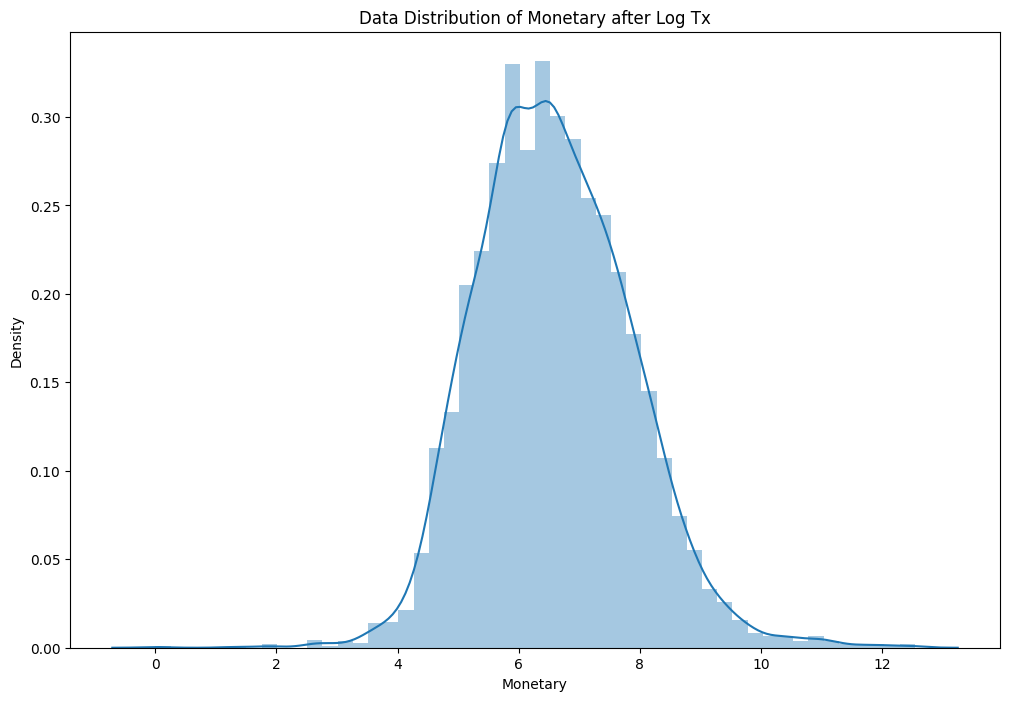

In [147]:
x = Log_Tfd_Data["Monetary"]
plt.figure(figsize=(12,8))
plt.title("Data Distribution of Monetary after Log Tx")
sns.distplot(x)

As we can see from the above plots, skewness has been removed from the data.

In [148]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [149]:
# Now run the correlation calculation again
cols = ["Recency_log", "Frequency_log", "Monetary_log"]
corr_matrix = rfm_df[cols].corr()
print(corr_matrix)


               Recency_log  Frequency_log  Monetary_log
Recency_log       1.000000      -0.483201     -0.481311
Frequency_log    -0.483201       1.000000      0.757164
Monetary_log     -0.481311       0.757164      1.000000


We will be choosing only Recency_log and Monetary_log only because Frequency_log has high correlation with Monetary_log

# Clustering

K Means Clustering 
Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.

KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method  can be used. These methods will help in selection of the optimum number of clusters.

In [150]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

Silhouette score method:

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.

## **Applying Silhouette Score Method on Recency and Monetary**

In [186]:
features = ['Recency_log','Monetary_log']
X_rec_mon = rfm_df[features].values

scalers = preprocessing.StandardScaler()
X_scaled = scalers.fit_transform(X_rec_mon)

X = X_scaled
range_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_clusters:
    clusterer= KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(X, preds)
    print("For n clusters = {}, silhouette score is = {}".format(n_clusters, score))
    

For n clusters = 2, silhouette score is = 0.42104336176043494
For n clusters = 3, silhouette score is = 0.34236654835906644
For n clusters = 4, silhouette score is = 0.36439258144803294
For n clusters = 5, silhouette score is = 0.3346565134922629
For n clusters = 6, silhouette score is = 0.3434335484894472
For n clusters = 7, silhouette score is = 0.34748118400760447
For n clusters = 8, silhouette score is = 0.3387018261899521
For n clusters = 9, silhouette score is = 0.34550122390817267
For n clusters = 10, silhouette score is = 0.34759553594027753
For n clusters = 11, silhouette score is = 0.3383252634657503
For n clusters = 12, silhouette score is = 0.3426403662972976
For n clusters = 13, silhouette score is = 0.3408735213499445
For n clusters = 14, silhouette score is = 0.34055288473171685
For n clusters = 15, silhouette score is = 0.34594673164465


Elbow Method:

Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.

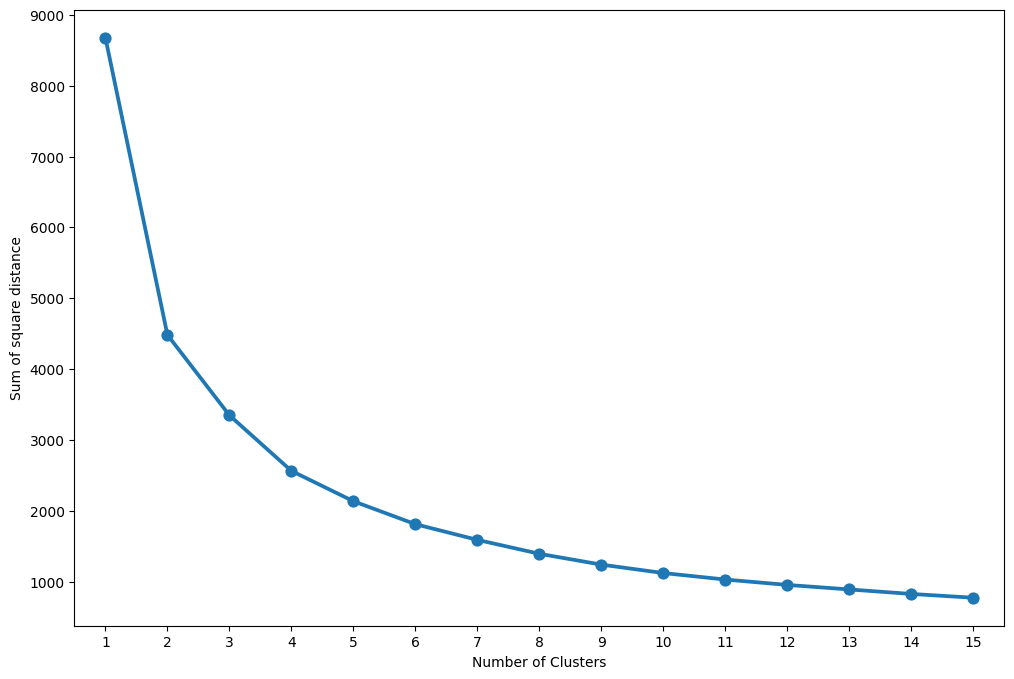

In [187]:
features = ['Recency_log', 'Monetary_log']
X_rec_mon = rfm_df[features].values 

scalers = preprocessing.StandardScaler()
X_scaled = scalers.fit_transform(X_rec_mon)

X = X_scaled

sum_of_sq_dist = {}
for cluster in range(1,16):
    km = KMeans(n_clusters=cluster, init = 'k-means++', max_iter=1000)
    km= km.fit(X)
    sum_of_sq_dist[cluster]= km.inertia_

#Plotting the Elbow Graph 
plt.figure(figsize=(12,8))
sns.pointplot(x=list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of square distance")
plt.show()

In [188]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_means = kmeans.predict(X)

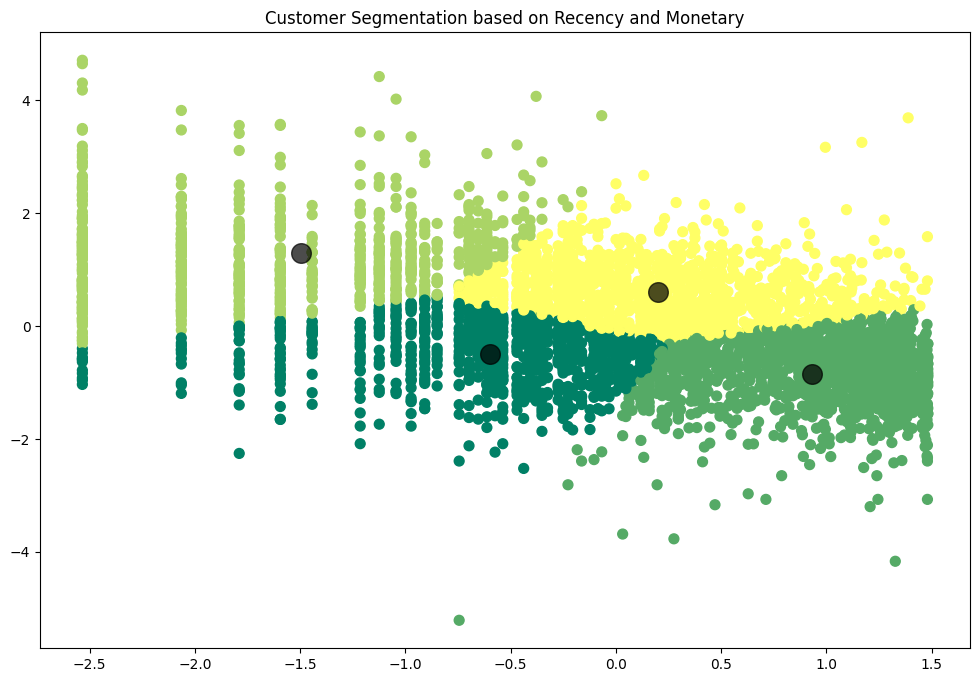

In [189]:
plt.figure(figsize=(12,8))
plt.title("Customer Segmentation based on Recency and Monetary")
plt.scatter(X[:,0], X[:,1], c = y_means, s = 50, cmap='summer')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha =0.7)

Here we can see that, Customers are well separated when we cluster them by Recency and Monetary.

DBSCAN Clustering:

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.
DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.

In [190]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

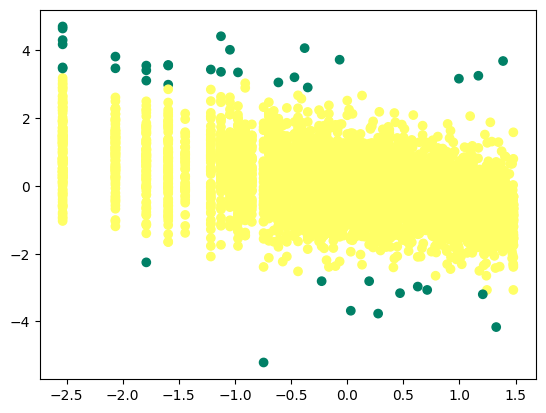

In [191]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_pred, cmap='summer')

## **Applying silhouette Score Method on Frquency and Monetary**

In [197]:
features = ["Frequency_log", "Monetary_log"]
X_fre_mon = rfm_df[features].values

scalers = preprocessing.StandardScaler()
X_scaled = scalers.fit_transform(X_fre_mon)

X=X_scaled

for cluster in range(2, 16):
    clusterer = KMeans(n_clusters=cluster)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(X, preds)
    print("For n clusters = {}, the silloutte score is {}".format(cluster,score))

For n clusters = 2, the silloutte score is 0.4782608772260966
For n clusters = 3, the silloutte score is 0.407400185453352
For n clusters = 4, the silloutte score is 0.3713531214842066
For n clusters = 5, the silloutte score is 0.34515857046671516
For n clusters = 6, the silloutte score is 0.3599605922257264
For n clusters = 7, the silloutte score is 0.338667994635095
For n clusters = 8, the silloutte score is 0.3542416633536274
For n clusters = 9, the silloutte score is 0.34762994924526747
For n clusters = 10, the silloutte score is 0.35960473224408956
For n clusters = 11, the silloutte score is 0.36875122837883034
For n clusters = 12, the silloutte score is 0.353596748233824
For n clusters = 13, the silloutte score is 0.36135631543916724
For n clusters = 14, the silloutte score is 0.3533317871982348
For n clusters = 15, the silloutte score is 0.35599784857254096


Elbow Method

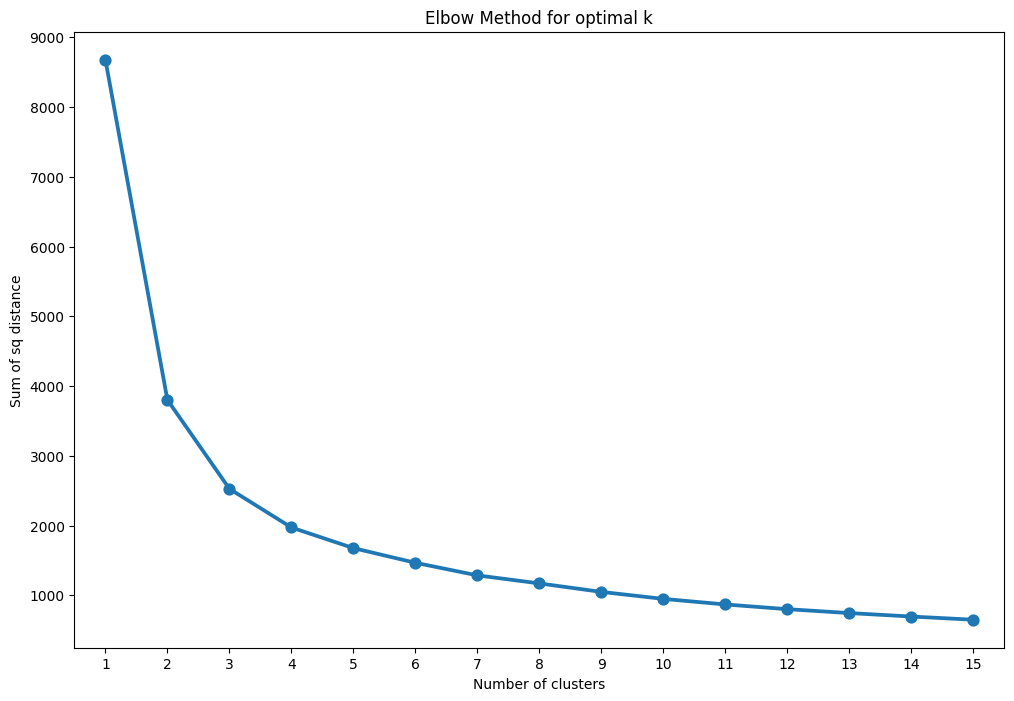

In [198]:
sum_of_sq_dist={}
for k in range(1, 16):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(X)
    sum_of_sq_dist[k]= km.inertia_
    

plt.figure(figsize=(12,8))
sns.pointplot(x=list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of sq distance")
plt.title("Elbow Method for optimal k")
plt.show()




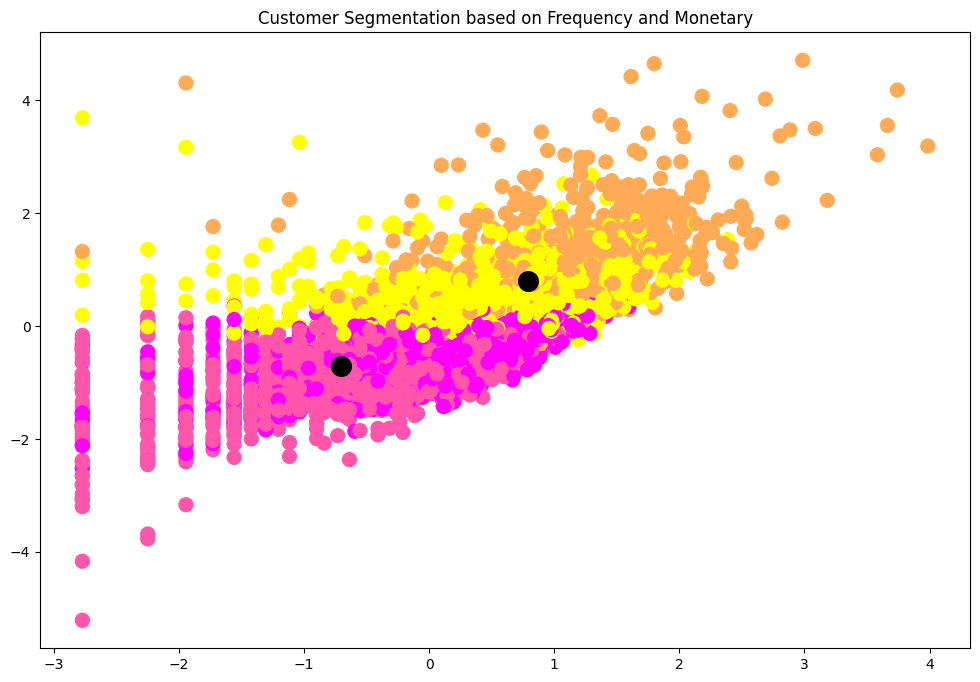

In [199]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(12,8))
plt.title("Customer Segmentation based on Frequency and Monetary")
plt.scatter(X[:,0], X[:,1], c = y_means, s=100, cmap="spring")

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", s = 200)

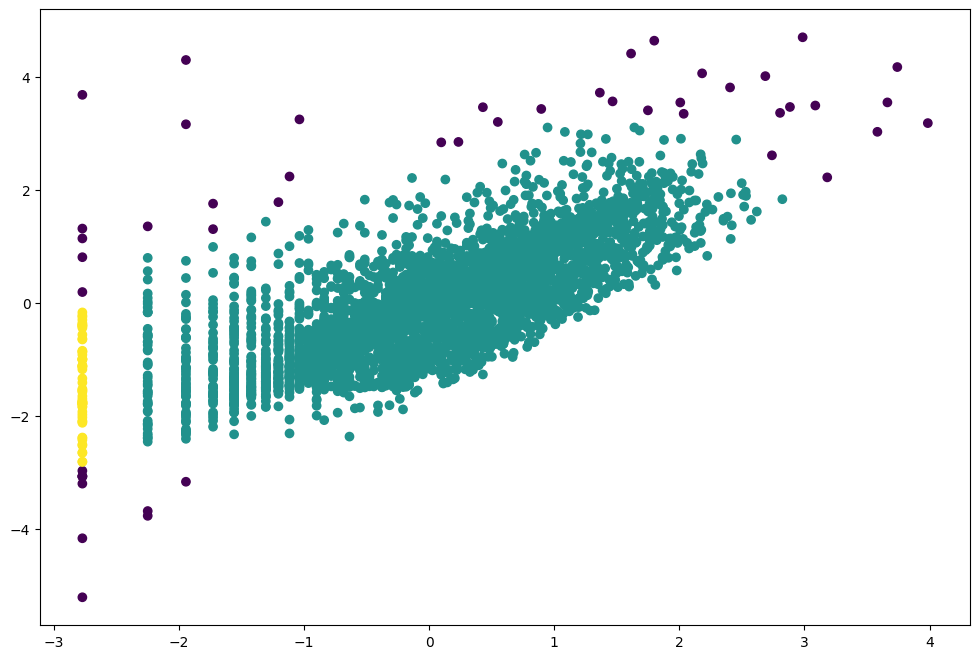

In [200]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

Applying Silhouette Method on Recency, Frequency and Monetary

In [202]:
features = ["Recency_log", "Frequency_log", "Monetary_log"]
X_features = rfm_df[features].values

scalers = preprocessing.StandardScaler()
X_Scaled = scalers.fit_transform(X_features)

X = X_Scaled

for clusters in range(2, 16):
    clusterer = KMeans(n_clusters=clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(X, preds)
    print("For clusters = {}, the sillhoutte score is {}".format(clusters, score))

For clusters = 2, the sillhoutte score is 0.3951770707909246
For clusters = 3, the sillhoutte score is 0.3050796099610811
For clusters = 4, the sillhoutte score is 0.3005279237919724
For clusters = 5, the sillhoutte score is 0.27837428328308783
For clusters = 6, the sillhoutte score is 0.27893395294237283
For clusters = 7, the sillhoutte score is 0.2616140885522701
For clusters = 8, the sillhoutte score is 0.2661387963640486
For clusters = 9, the sillhoutte score is 0.25272956413011
For clusters = 10, the sillhoutte score is 0.26526596874785857
For clusters = 11, the sillhoutte score is 0.2616492057354466
For clusters = 12, the sillhoutte score is 0.2621018821789076
For clusters = 13, the sillhoutte score is 0.26281763046265627
For clusters = 14, the sillhoutte score is 0.2597688181386056
For clusters = 15, the sillhoutte score is 0.25861911034029306


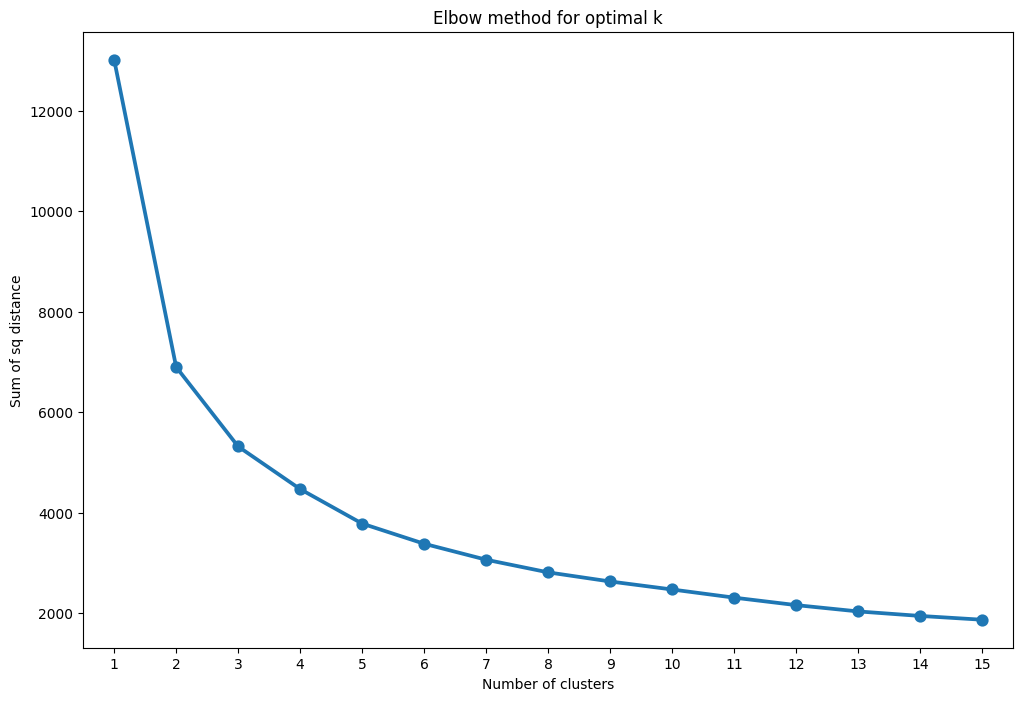

In [203]:
sum_of_sq_dist= {}
for k in range(1,16):
    km = KMeans(n_clusters= k, init='k-means++', max_iter=1000)
    km = km.fit(X)
    sum_of_sq_dist[k]= km.inertia_
    
plt.figure(figsize=(12,8))
sns.pointplot(x= list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of sq distance")
plt.title("Elbow method for optimal k")
plt.show()
    

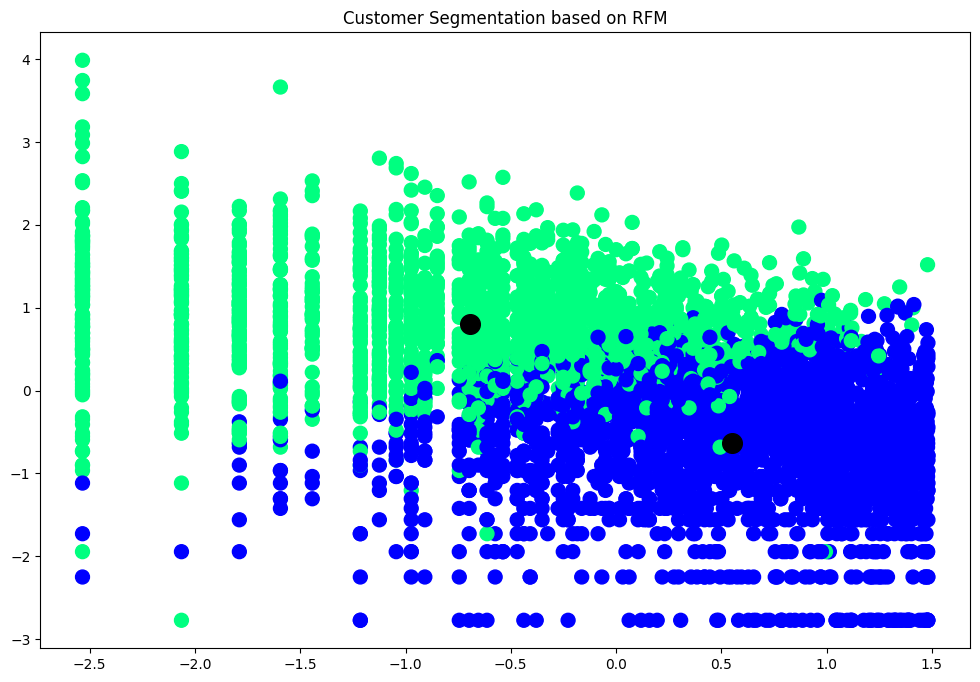

In [206]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_preds = kmeans.predict(X)

plt.figure(figsize=(12,8))
plt.title("Customer Segmentation based on RFM")
plt.scatter(X[:,0], X[:,1], c = y_preds, s=100, cmap='winter')

centers= kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c= "black", s = 200)

In [164]:
print(X)

[[ 1.38836443e+00 -2.77292853e+00  3.68875227e+00]
 [-2.06444705e+00  1.14932524e+00  1.40714410e+00]
 [ 3.93804279e-01 -1.84736382e-01  7.15456799e-01]
 ...
 [-1.21474602e+00 -9.00057288e-01 -1.11279023e+00]
 [-1.78943563e+00  2.22261852e+00  8.36639760e-01]
 [ 5.35650412e-04  4.29157375e-01  7.32880978e-01]]


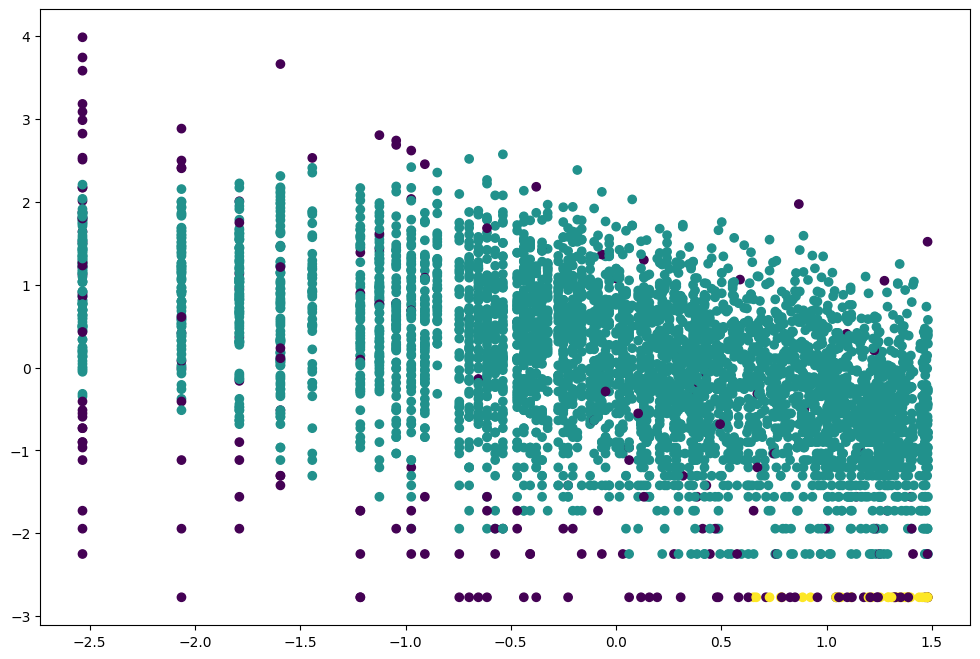

In [205]:
y_preds = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y_preds)


Applying Silhouette Method on Recency and Frequency

In [207]:
features = ["Recency_log", "Frequency_log"]
X_rec_fre = rfm_df[features].values

scalers = preprocessing.StandardScaler()
x_scaled = scalers.fit_transform(X_rec_fre)
x=x_scaled

for k in range(2, 15):
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_
    
    score = silhouette_score(X, preds)
    print("For no of cluster {} the sillhoutte score is {}".format(k, score))

For no of cluster 2 the sillhoutte score is 0.39512408652812586
For no of cluster 3 the sillhoutte score is 0.3028168386903721
For no of cluster 4 the sillhoutte score is 0.30173405668754577
For no of cluster 5 the sillhoutte score is 0.2786553407784627
For no of cluster 6 the sillhoutte score is 0.278865813150812
For no of cluster 7 the sillhoutte score is 0.2624001515465531
For no of cluster 8 the sillhoutte score is 0.2660569408685305
For no of cluster 9 the sillhoutte score is 0.25269525043167707
For no of cluster 10 the sillhoutte score is 0.25157124666804254
For no of cluster 11 the sillhoutte score is 0.2563088268124273
For no of cluster 12 the sillhoutte score is 0.2645308848584655
For no of cluster 13 the sillhoutte score is 0.26238893038352223
For no of cluster 14 the sillhoutte score is 0.2609436309598645


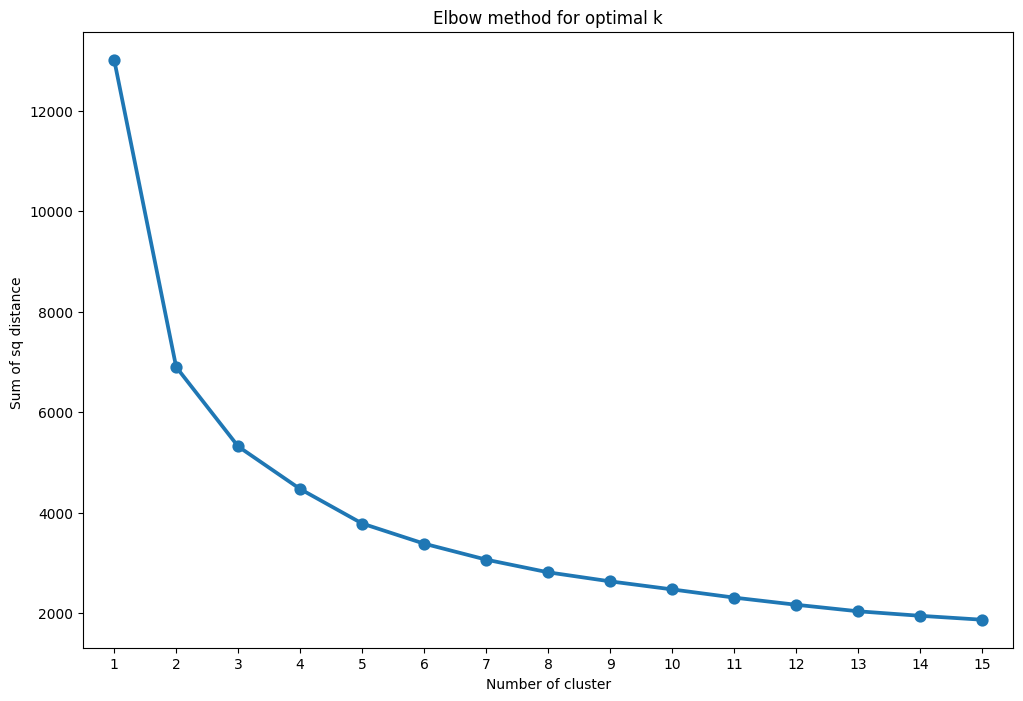

In [209]:
sum_of_sq_dist={}
for k in range(1,16):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km=km.fit(X)
    sum_of_sq_dist[k]=km.inertia_
    
    
plt.figure(figsize=(12,8))
sns.pointplot(x=list(sum_of_sq_dist.keys()), y= list(sum_of_sq_dist.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of sq distance ")
plt.title("Elbow method for optimal k")
plt.show()
    

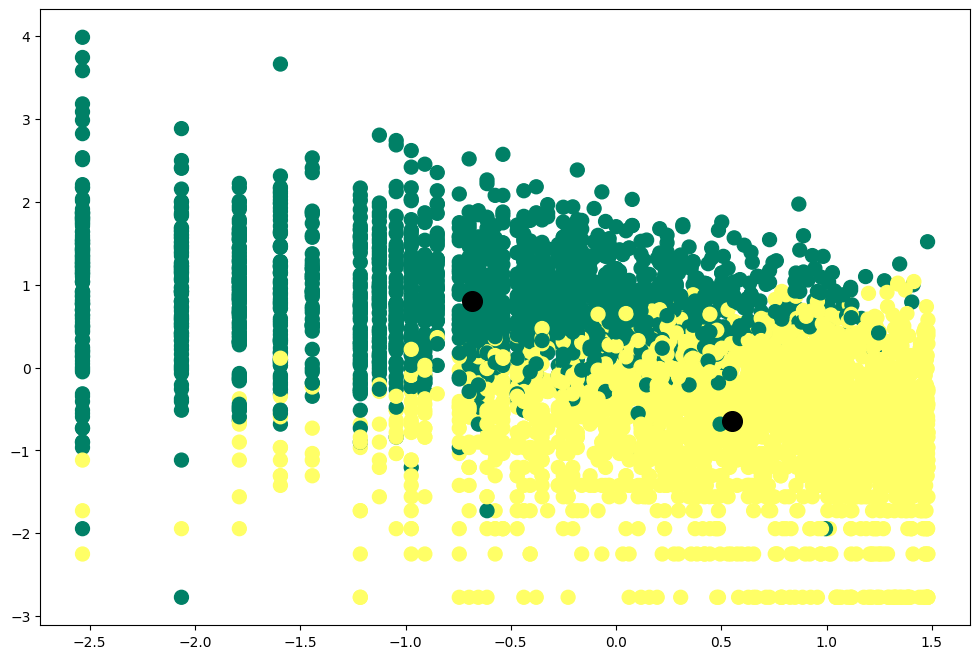

In [210]:
km = KMeans(n_clusters=2)
km.fit(X)
y_preds = km.predict(X)

plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c= y_preds, s=100, cmap="summer")
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black",s=200)

Applying DBScan 

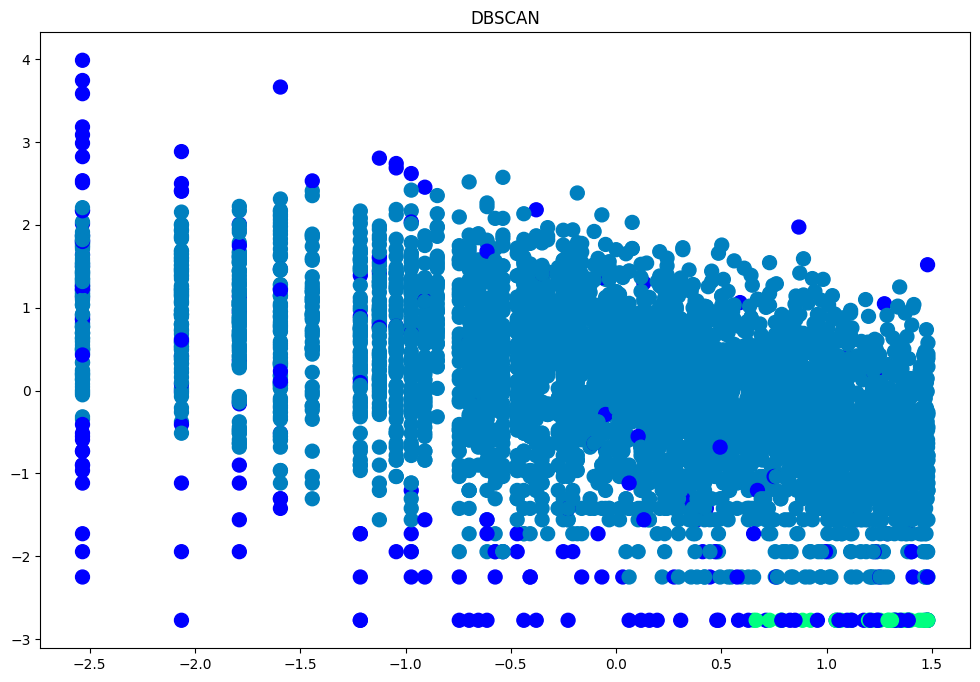

In [211]:
preds = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=preds, s=100, cmap="winter")
plt.title("DBSCAN")

plt.show()

# Hierarchical clustering

Hierarchical clustering is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.

Dendogram

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

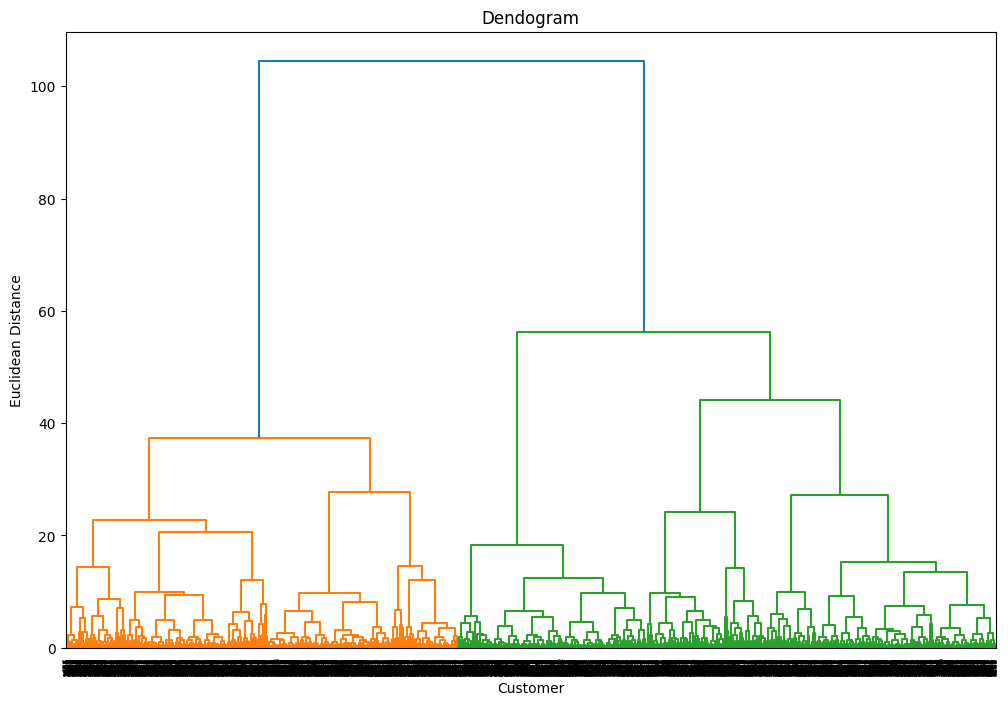

In [173]:
import scipy.cluster.hierarchy as sch 

plt.figure(figsize=(12,8))
dendogram = sch.dendrogram(sch.linkage(X, method ='ward'))
plt.title("Dendogram")
plt.xlabel("Customer")
plt.ylabel("Euclidean Distance")
plt.show()

In [181]:
features = ["Recency_log", "Frequency_log", "Monetary_log"]
x_featurs = rfm_df[features].values

scalers = preprocessing.StandardScaler()
x_scaled = scalers.fit_transform(x_featurs)

X=x_scaled

In [182]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [183]:
print(X)

[[ 1.38836443e+00 -2.77292853e+00  3.68875227e+00]
 [-2.06444705e+00  1.14932524e+00  1.40714410e+00]
 [ 3.93804279e-01 -1.84736382e-01  7.15456799e-01]
 ...
 [-1.21474602e+00 -9.00057288e-01 -1.11279023e+00]
 [-1.78943563e+00  2.22261852e+00  8.36639760e-01]
 [ 5.35650412e-04  4.29157375e-01  7.32880978e-01]]


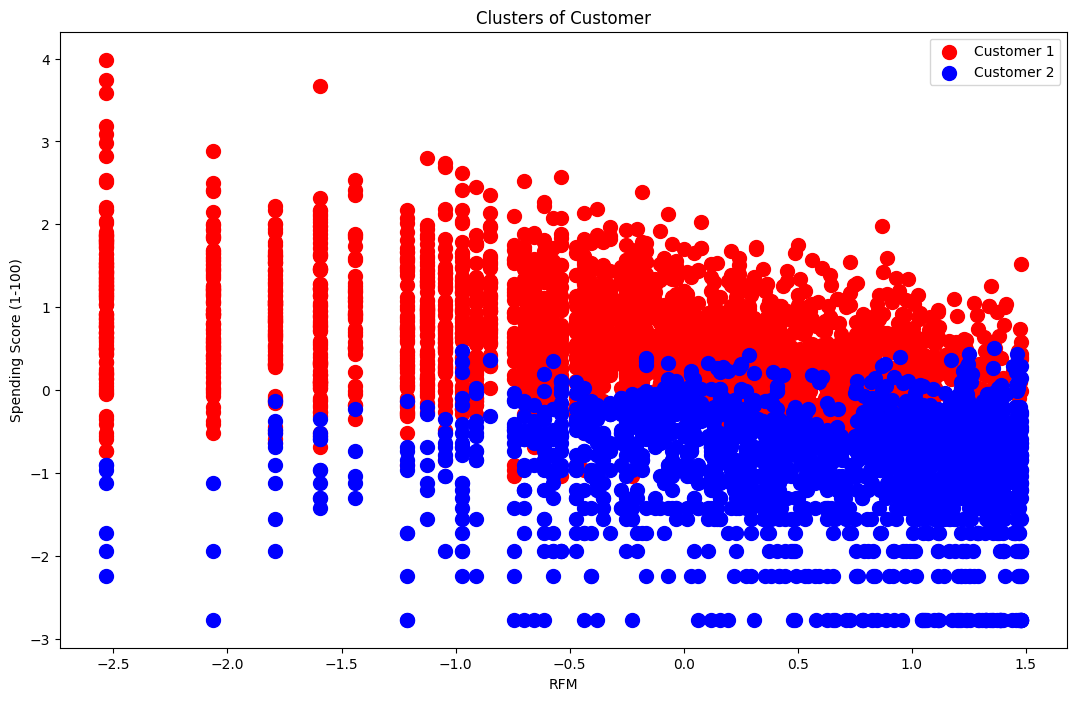

In [184]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()